(final_template)=

# Dam Removal and Salmon Spawning Rates

![](conditdam.png)
**The White Salmon River before and after Condit Dam's removal** 

# Prior Knowledge

In the past few decades, the United States has seen a dramatic increase in the number of dam removals. Dams are removed for a variety of reasons, including safety, cost, and loss of function as dams reach the end of their engineered lifecycles. Additionally, as we've learned more about the ecological effects of dam construction and maintenance, the recovery of ecosystem function has become a pertinent goal accross dam removals (Bellmore et al. 2019).

The removal of Condit Dam is an important case study on the effects of dam removals on surrounding landscapes. Located on the White Salmon River in southwest Washington State, the dam was removed in 2011 and was the largest dam removal in the United States at the time. It released 180,000 m<sup>3</sup> of impounded sediment, the largest volume ever released in the US by breaching a dam with explosives. (Allen et al. 2016). The White Salmon River is an important salmon habitat and has historically been integral to salmon hatchery programs in the Columbia River Gorge. The health of its salmon populations are especially important to the physical, spiritual, and cultural nourishment of the Yakama Nation ("White Salmon River", _American Rivers_). 

Today, salmon have returned to upstream spawning grounds on the White Salmon River. Their recovery is in part due to the White Salmon Working Group (WSWG), a conservation group formed in 2006 to assess fish populations and develop a plan to mitigate the effects of the dam's removal. The WSWG relocated Chinook salmon and allowed other species to naturally recolonize, which led to the repopulation and recolonization of salmon accross species following the removal.

Another river in southwest Washington, the Lewis river still currently has a dam (four, actually). Its facilities deny access to traditional spawning habitat for a majority of adult Lower Columbia River salmon and prevent juvenile salmon from migrating to the ocean ("Lewis River", _American Rivers_). Its ecological makeup is comparable to the White Salmon River pre dam removal, from its native salmon species to its winding rapids.

Dam removals have historically been regarded as reversing the negative effects of dam construction. However, the reality isn't that simple. Ecological response trajectories post dam removal may be more complicated than a simple linear healing period in which the river and surrounding ecosystem gradually returns to what it looked like prior to construction. In fact, new ecologic conditions may not resemble the predam conditions, even as the river heals (Bellmore et al. 2019). 

There are important differences in ecological response trajectories between locations relative to the removed dam. We see a general movement of organisms upstream of the former reservoir, where they tend to recolonize or initially colonize new habitats. Dam removal may also facilitate the spread of invasive species upstream, so the native species may be pushed out. Within the former reservoir, major physical and hydrologic changes trigger large ecological responses. Lotic fish species (those which prefer flowing rivers to static environments) may repopulate. Downstream, the effects of released sediment create an unstable streambed not suitable for many species. Here, where living conditions are generally worst following the removal, lowered fish abundance may persist as long as 15 years before populations increase again. All three domains interact with each other, creating dynamic trajectories which indicate the complexity of ecological regrowth (Bellmore et al. 2019).

Given the central position of salmon in the White Salmon River's ecosystem and the magnitude of Condit Dam's removal, it is important we understand how the removal affected salmon populations. We must consider how dynamic healing trajectories might complicate narratives about healing post dam removal. 

```{image} rivermap.png
:alt: Map of rivers in southwest Washington
:class: bg-primary
:width: 600px
:align: center
```
**Location of the White Salmon River and Lewis River in southwest Washington State**

# Causal question

### What was the effect of Condit Dam's Removal on the size of the White Salmon River's salmon population?
**Causal Quantity: ATT**
$$E[Y(1) - Y(0) | T=1]$$

In this case, the treatment effect among the treated (the salmon directly affected by the removal of Condit Dam) is most relevant. Particularly since dam removals are so specific to the unique environmental and architectural conditions of each dam, it is more impactful to consider how this dam removal affected its local salmon populations than to consider the difference between salmon of affected and unaffected rivers.   

# Design

## Study strategy

The following study is a difference-in-differences quasi experiment. These experiments look at the difference in outcomes between a treatment and control group before and after a chance event. My treatment group will be the White Salmon River, where the dam was removed, and my control group will be Lewis River, whose salmon populations are still affected by dams. 

### Assumptions
1. Consistency: Since all salmon in the treated group are affected by the same chance event (the removal of Condit Dam), there is only realistically one version of the treatment. Therefore, the observed outcomes will reflect the hypothetical outcomes.
2. No interference: In an ecosystem, any event may have effects that ripple outwards to other parts of the system. However, since the rivers with treatment and control salmon are not directly connected, I think it is fair to say that the no interference assumption holds. Additionally, salmon that migrate due to dam removal tend to travel upstream away from released sediment, and they would have to travel downstream from the White Salmon River to reach Lewis River. 
3. Parallel trends: Based on the graph below, I think it is reasonable to say that the parallel trends assumption holds. The graph has large error bars, which could mean that parallelism is increased _or_ decreased in reality. However, the parallel trends of other rivers are vastly different, so I think it is fair to say that these ones are comparable. There are three confounders I identified that would affect the White Salmon River more than the Lewis river: sample location, infrastructural barriers, and the White Salmon Working Group (WSWG). Since dam removals have different effects at different points on the river, the location (which we cannot determine from the dataset) could differently affect the White Salmon River's survey results. Infrastructural barriers like boundaries around the demolition zone would likely affect the sampling capabilities for the White Salmon River. The WSWG's efforts at salmon relocation and conservation would only affect the treatment group.

![](FinalDAG.png)

## Covariates

**Dataset: https://data.wa.gov/Natural-Resources-Environment/WDFW-SGS/idwx-fext/about_data**

WDFW-SGS is a summary of live fish counts, dead fish counts, and redd (nest) counts stored in the Washington Department of Fish and Wildlife (WDFW) Spawning Ground Survey (SGS) database. It helps monitor the status and trends of Coastal, Puget Sound, and Columbia Basin salmonid stocks. To provide evidence of salmonid spawning activity, it records counts of adult fish and redds. Each sample has a unique survey ID, survey date, stream name, and run year and often includes species data. It more sparingly includes the estimated percent seen, dead total, and redd data. It has data going back to 1930 and is still updated daily.

**Columns:**
- SurveyDate: Date when the survey was conducted
- StreamName: Name of the stream, river, or creek
- SpeciesAbbr: Salmon species, abbreviated
- Species: Salmon species
- RunYear: The corresponding salmon run year to when the sample was collected
- EstimatedPctSeen: From the surveyers own estimate at the percent of total salmon they accounted for
- LiveTotal: Number of alive adult salmon recorded
- DeadTotal: Number of dead adult salmon recorded
- NewReddCount: Number of redds (nests) not previously recorded
- PreviousReddCount: Number of redds (nests) previously recorded
- CombinedReddCount: Total number of redds (nests)

**Treatment variable: StreamName**

**Outcome variable: LiveTotal**

Salmon counts are acquired through field work in seasonal surveys. Each sample includes the stream name, which I am using to categorize my treatment and control groups.

As described in the parallel trends discussion, sample location, infrastructural barriers, and the WSWG's efforts are three confounders that could affect the treatment and control groups differently. These confounders are not represented in the dataset. Environmental factors are another confounder, but are so difficult to measure that for my study I assume that the rivers are being affected similarly (this seems reasonable as they are both in Southwest Washington and have other similar characteristics).

# Estimation

### Importing and Cleaning Dataset

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from linearmodels.panel import PanelOLS

In [20]:
# Import all possible columns we might need later
wdfw_og_df = pd.read_csv("~/comsc341cd.github.io/projects/wdfw.csv", usecols=[0, 1, 4, 5, 6, 28, 29, 31, 33, 35, 40, 46, 47, 48])

# Clean the dataframe
wdfw_og_df = wdfw_og_df.dropna(subset=["LiveTotal"])

wdfw_og_df.head()

,SurveyID,SurveyDate,WRIA,StreamCatalogCode,StreamName,SpeciesAbbr,Species,RunYear,EstimatedPctSeen,LiveTotal,DeadTotal,NewReddCount,PreviousReddCount,CombinedReddCount
22,690180,10/10/2022,7,07.0060,Edgecomb Creek,COHO,Coho Salmon,2022.0,95.0,0.0,0.0,0.0,NaN,NaN
28,690186,10/14/2022,7,07.0940,Wallace River (RB),CHIN,Chinook Salmon,2022.0,NaN,2.0,23.0,0.0,NaN,NaN
29,690187,09/23/2022,5,05.0001,Stillaguamish R. Cont. As S.F. Stillaguamish R...,CHIN,Chinook Salmon,2022.0,90.0,8.0,1.0,3.0,NaN,NaN
30,690188,09/29/2022,5,05.0062,Pilchuck Creek (RB),CHIN,Chinook Salmon,2022.0,90.0,0.0,0.0,0.0,NaN,NaN
31,690189,09/13/2022,5,05.0001,Stillaguamish R. Cont. As S.F. Stillaguamish R...,CHIN,Chinook Salmon,2022.0,95.0,0.0,0.0,0.0,NaN,NaN


In [21]:
# Extract most important columns for our analysis
wdfw_df = wdfw_og_df[['StreamName', 'SpeciesAbbr', 'RunYear', 'LiveTotal']]

# Select only the treatment and control rivers
wdfw_df = wdfw_df[(wdfw_df['StreamName'] == 'WHITE SALMON River  29.0160') | (wdfw_df['StreamName'] == 'LEWIS River -NF   27.0168')]

# Restrict to a relevant time frame
wdfw_df = wdfw_df[wdfw_df['RunYear'] >= 2005]

# Create post treatment binary column
wdfw_df['post_treatment'] = wdfw_df['RunYear'] > 2011
# Create treatment group binary column
wdfw_df['is_whitesalmon'] = wdfw_df['StreamName'] == 'WHITE SALMON River  29.0160'
# Create treated column (sample is post treatment and in the treated group)
wdfw_df['is_treated'] = wdfw_df['post_treatment'] & wdfw_df['is_whitesalmon']

wdfw_df.head(10)

,StreamName,SpeciesAbbr,RunYear,LiveTotal,post_treatment,is_whitesalmon,is_treated
15087,WHITE SALMON River 29.0160,CHIN,2016.0,0.0,True,True,True
15088,WHITE SALMON River 29.0160,CHUM,2016.0,0.0,True,True,True
15089,WHITE SALMON River 29.0160,COHO,2016.0,0.0,True,True,True
15090,WHITE SALMON River 29.0160,STHD,2016.0,0.0,True,True,True
15091,WHITE SALMON River 29.0160,CHIN,2016.0,0.0,True,True,True
15092,WHITE SALMON River 29.0160,CHUM,2016.0,0.0,True,True,True
15093,WHITE SALMON River 29.0160,COHO,2016.0,0.0,True,True,True
15094,WHITE SALMON River 29.0160,STHD,2016.0,0.0,True,True,True
15095,WHITE SALMON River 29.0160,CHIN,2016.0,0.0,True,True,True
15096,WHITE SALMON River 29.0160,CHIN,2016.0,0.0,True,True,True


### Visualizing Parallel Trends

Text(0, 0.5, '# of Salmon')

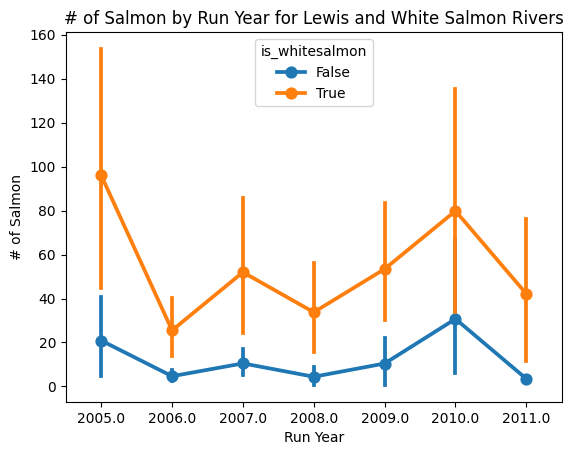

In [22]:
# Restrict wdfw_df to pre treatment
wdfw_df_pre = wdfw_df[wdfw_df['post_treatment'] == False]

# Plot an sns.pointplot using wdfw_df_pre of 'LiveTotal' against 'RunYear', with 'StreamName' as the hue
sns.pointplot(data=wdfw_df_pre, x='RunYear', y='LiveTotal', hue='is_whitesalmon')
plt.title('# of Salmon by Run Year for Lewis and White Salmon Rivers')
plt.xlabel('Run Year')
plt.ylabel('# of Salmon')

## Diff-in-Diff Estimates

### Linear Regression
**General regression formula:**
$$
Y = \beta_0 + \beta_1 (\text{treated group}) + \beta_2 (\text{after treatment}) + \beta_3 (\text{treated group} \times \text{after treatment}) + \epsilon
$$

**Specific regression formula for this study:**
$$
Y = \beta_0 + \beta_1 (\text{is\_whitesalmon}) + \beta_2 (\text{post\_treatment}) + \beta_3 (\text{is\_treated}) + \epsilon
$$
The ATT corresponds to $\beta_3$, which tells us how much larger the treated group effect is in the post-treatment period,
compared to what it would have been in the pre-treatment period.

In [23]:
formula = 'LiveTotal ~ 1 + is_whitesalmon + post_treatment + is_treated'
did_model = smf.ols(formula, data=wdfw_df)
did_results = did_model.fit()
print(did_results.summary())

                            OLS Regression Results                            
Dep. Variable:              LiveTotal   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     49.67
Date:                Sun, 11 May 2025   Prob (F-statistic):           8.01e-32
Time:                        12:10:16   Log-Likelihood:                -48754.
No. Observations:                8823   AIC:                         9.752e+04
Df Residuals:                    8819   BIC:                         9.754e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

### Linear Regression Results

**ATT Point Estimate:** -60.47  
**95% Confidence Interval:** [-70.78, -50.17]

## Two-Way Fixed Effects Model

Since ecological healing trajectories are often more dynamic than a linear model, a two-way fixed effects model that accounts for multiple time periods may more accurately reflect the effect on salmon populations and reduce variance in our estimate.



In [24]:
# Create a new time column where the chance event is centered on 0 (2011 becomes 0)
wdfw_df['time_centered'] = wdfw_df['RunYear'] - 2011

# Drop the 2013 rows from the data to account for colinearity
wdfw_df = wdfw_df[wdfw_df['RunYear'] != 2013]

# Set the index to be the['StreamName', 'RunYear'] columns
wdfw_df = wdfw_df.set_index(["StreamName", "RunYear"])

# Use a two-way fixed effects model with time_centered*is_whitesalmon
# formula = 'Y ~ EntityEffects + TimeEffects + C(time_centered)*treated_group'
formula = 'LiveTotal ~ EntityEffects + TimeEffects + C(time_centered)*is_whitesalmon'

# Fit the model with clustered standard errors and drop absorbed variables
model = PanelOLS.from_formula(formula, wdfw_df, drop_absorbed=True)
results = model.fit(cov_type='clustered')
results.summary

/tmp/ipykernel_2777633/2908860547.py:16: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

C(time_centered)[-5.0], C(time_centered)[-4.0], C(time_centered)[-3.0], C(time_centered)[-2.0], C(time_centered)[-1.0], C(time_centered)[0.0], C(time_centered)[1.0], C(time_centered)[3.0], C(time_centered)[4.0], C(time_centered)[5.0], C(time_centered)[6.0], C(time_centered)[7.0], C(time_centered)[8.0], C(time_centered)[9.0], is_whitesalmon

  results = model.fit(cov_type='clustered')


Dep. Variable:,LiveTotal,R-squared:,0.0497
Estimator:,PanelOLS,R-squared (Between):,-2344.7
No. Observations:,8384,R-squared (Within):,-100.11
Date:,"Sun, May 11 2025",R-squared (Overall):,-104.32
Time:,12:10:30,Log-likelihood,-4.601e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,31.208
Entities:,2,P-value,0.0000
Avg Obs:,4192.0,Distribution:,"F(14,8354)"
Min Obs:,2621.0,,
Max Obs:,5763.0,F-statistic (robust):,21.950


### Two-Way Fixed Effects Regression Results
**Post-treatment results (not including 2013 because Lewis River is missing that data):**

| Year | Point Estimate | 95% Confidence Interval |
| --- | --- | --- |
| 2012 | -46.84 | [-107.79, 13.86] |
| 2014 | -280.71 | [-368.70, -192.71] |
| 2015 | -92.65 | [-151.89, -33.40] |
| 2016 | -90.01 | [-147.86, -32.29] |
| 2017 | -82.64 | [-139.46, -25.83] |
| 2018 | -89.01 | [-146.24, -31.93] |
| 2019 | -83.34 | [-140.59, -26.01] |
| 2020 | -88.53 | [-146.81, -30.26] |

# Interpretation

The point estimate for the linear regression model suggests that the removal of Condit Dam decreased the size of White Salmon River's population by about 60 compared to if trends had followed in the pre-treatment data. When we look at the two-way fixed effects regression results, we see a more complicated narrative of post-treatment effects. The 2012 estimate of roughly -47 is uniquely less negative than other post-treatment data. 2014 sees a significant decrease, however, with the point estimate being about -281. From there point estimates remain roughly around -87 from 2015 to 2020. All estimates have large confidence intervals, and in general the results are inconclusive. However, the dramatic decrease in 2014, as well as the general decrease in the years 2015-2020, may be significant.

As this estimation used the ATT, the results apply to salmon in the White Salmon River following the removal of Condit Dam. These results are not generalizable to another population, though they may provide insight into dam removals and salmon spawning rates that could be useful in motivating studies elsewhere. 

There are many limitations on my study design and analysis. Missing data means that parallel trends and the estimates that depend on those trends may be inaccurate. The data also relies on the surveys from field work observation, which may involve natural human error. The Lewis River does not have data for 2013; the reason for this gap is not given in the dataset but may be related to the significant decrease in salmon population size in 2014. In general, ecological data is difficult to model. As Bellmore et al. note, ecological response trajectories including salmon spawn rates may be affected my multiple causal pathways and feedback loops (Bellmore et al. 2019, 4). Accurately modeling the effects of dam removal on salmon spawn rates will necessitate more complex models, and ideally more thorough data.

The Condit Dam was removed in 2011, but we don't see a significant decrease in fish populations until 2014. The WSWG attempted to promote Chinook salmon recolonization upstream of the removed dam. They found that in the year following the removal, salmon populations remained stable, but provided little analysis for the coming years (Allen et al. 2016, 200). The decrease in 2014 may be reflective of salmon populations struggling to recolonize different habitats long term. Overall, the data is inconclusive, but a surprising decrease three years after the removal indicates a need for more thorough long-term analysis of the effects of dam removals on salmon populations. Further studies should be done to inform future salmon conservation or relocation plans. Statistical analysis combined with expert ecological knowledge could help determine the best course of action for salmon relocation prior to dam removal and support the ecosystem recovery that motivates many dam removals. 

## References
Allen, Brady M., Engle, Rod O., and Zendt, Joseph S. 2016. “Salmon and Steelhead in the White Salmon River after the Removal of Condit Dam–Planning Efforts and Recolonization Results.” _Fisheries_ 41 (4): 190-203. https://doi.org/10.1080/03632415.2016.1150839.

Bellmore, Ryan J., Pess, George R., and Duda, Jeffrey J. 2019. “Conceptualizing Ecological Responses to Dam Removal: If You Remove It, What's to Come?” _Bioscience_ 69 (1): 26-39. https://doi.org/10.1093/biosci/biy152.

"Lewis River." _American Rivers_. https://www.americanrivers.org/river/lewis-river/. 

“White Salmon River.” _American Rivers_. https://www.americanrivers.org/river/white-salmon-river/. 